In [1]:
from loadTDMS import *
from fft_test import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
for i in range(0,15):
    num = 4
    load_path = rf"Z:\100 Raw_data\20221027---切削実験\AE\Cutting\AE_{num}.tdms"
    d = load_tdms(load_path, ch_num=3)
    d = d[0][i*1000000:i*1000000+16384]

    dt = 1/10**6
    split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
    overlap = 0.5  # オーバーラップ率
    window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman
    y_label = "amplitude"
    y_unit = "V"
    N = len(d)
    fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)


    fq_, amp_ = FFT_main(fq, d, dt, split_t_r, overlap, window_F)

    #fig保存ー正規化前
    output_FN = fr"Z:\200 Produced_data\20221027\FFTonePath_Focus\fig\FFT_{num}_{i}M"
    plot_FFT(fq_, amp_, output_FN, y_label, y_unit,num)

    #dBに変換してcsv保存ー正規化前
    amp_db = pd.DataFrame({'db': 20*np.log10(amp_)})
    output_csv = fr"Z:\200 Produced_data\20221027\FFTonePath_Focus\csv\FFT_{num}_{i}M.csv"
    amp_db.to_csv(output_csv, header=False, index=False)

In [7]:
load_path = rf"Z:\100 Raw_data\20221027---切削実験\AE\Cutting\AE_4.tdms"
d = load_tdms(load_path, ch_num=3)
len(d[0])

15727369

In [15]:
def fft_integrated(num):
    load_path = rf"Z:\100 Raw_data\20221027---切削実験\AE\Cutting\AE_{num}.tdms"
    d = load_tdms(load_path, ch_num=3)
    d = d[0][x:x+16384]
    
    dt = 1/10**6
    split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
    overlap = 0.5  # オーバーラップ率
    window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman
    y_label = "amplitude"
    y_unit = "V"
    N = len(d)
    fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
    
    
    fq_, amp_ = FFT_main(fq, d, dt, split_t_r, overlap, window_F)

    #fig保存ー正規化前
    output_FN = fr"Z:\200 Produced_data\20221027\FFTonePath_Focus\fig\FFT_{num}_{x}"
    plot_FFT(fq_, amp_, output_FN, y_label, y_unit,num)

    #dBに変換してcsv保存ー正規化前
    amp_db = pd.DataFrame({'db': 20*np.log10(amp_)})
    output_csv = fr"Z:\200 Produced_data\20221027\FFTonePath_Focus\csv\FFT_{num}_{x}.csv"
    amp_db.to_csv(output_csv, header=False, index=False)

In [16]:
for i in range(0,10):
    x = 9_100_000 + 10_000 * i
    fft_integrated(4)

In [ ]:
import os

for i in tqdm(range(2,170)):
    path = rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\{i}"
    os.mkdir(path)

## ここから　1回転のガチのやつ
fft_integrated_one_rotationは17時間かかる

In [112]:
def fft_integrated_one_rotation(start,end,num,j):
    load_path = rf"Z:\100 Raw_data\20221027---切削実験\AE\Cutting\AE_{num}.tdms"
    d = load_tdms(load_path, ch_num=3)
    d = d[0][start:end]
    
    dt = 1/10**6
    split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
    overlap = 0.5  # オーバーラップ率
    window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman
    y_label = "amplitude"
    y_unit = "V"
    N = len(d)
    fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
    
    
    fq_, amp_ = FFT_main(fq, d, dt, split_t_r, overlap, window_F)

#     return 20*np.log(amp_)

    #dBに変換してcsv保存ー正規化前
    amp_db = pd.DataFrame({'db': 20*np.log10(amp_)})
    output_csv = rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\{num}\AE_FFT_{num}_{j}.csv"
    amp_db.to_csv(output_csv, header=False, index=False)

In [127]:
def fft_integrated_one_rotation_do_not_to_csv(start,end,num,j):
    load_path = rf"Z:\100 Raw_data\20221027---切削実験\AE\Cutting\AE_{num}.tdms"
    d = load_tdms(load_path, ch_num=3)
    d = d[0][start:end]
    
    dt = 1/10**6
    split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
    overlap = 0.5  # オーバーラップ率
    window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman
    y_label = "amplitude"
    y_unit = "V"
    N = len(d)
    fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
    
    
    fq_, amp_ = FFT_main(fq, d, dt, split_t_r, overlap, window_F)

    return 20*np.log10(amp_) +85

    #dBに変換してcsv保存ー正規化前
#     amp_db = pd.DataFrame({'db': 20*np.log10(amp_)})
#     output_csv = rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\{num}\AE_FFT_{num}_{j}.csv"
#     amp_db.to_csv(output_csv, header=False, index=False)

In [21]:
for i in range(1,2):
    for j in tqdm(range(0,164)):
        num = i
        sample_num = 2**14
        start = j * sample_num
        end = (j+1) * sample_num
        fft_integrated_one_rotation(start,end,num,j)

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


In [22]:
num = 1
d = pd.read_csv(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\{num}\AE_FFT_{num}_{j}.csv")


,-9.10000749875837
0,-11.016135
1,-14.734926
2,-23.412497
3,-23.969392
4,-19.662293
...,...
814,-73.564000
815,-71.328450
816,-71.798203
817,-74.217963


In [34]:
d1 = pd.read_csv(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\csv\FFT_4_9140000.csv")
d2 = pd.read_csv(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\csv\FFT_4_9150000.csv")
d3 = pd.read_csv(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\csv\FFT_4_9160000.csv")

In [63]:
import csv
# import pprint
import time

with open(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\csv\FFT_4_9140000.csv") as f:
    readers = csv.reader(f, delimiter=' ')

In [80]:
import csv 

items = []

nums = [9140000,9150000,9160000]

for num in nums:
    with open(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\csv\FFT_4_{num}.csv") as csvfile:    
        csvReader = csv.reader(csvfile)
        item = []
        for row in csvReader:        
            item.append(float(row[0]) +85)
        items.append(item)

mensekis = np.array(items)

In [90]:
mensekis.shape

(3, 820)

## 積分関数

In [86]:
def time_hist_integrator_rect(dt, dx_dt):
    xt = 0.
    x = []
    for dxt_dt in dx_dt:
        xt += dxt_dt * dt
        x.append(xt)        
    return x[-1]

### ジェットコースター、過渡期、通常型の面積のだいたいの数値

In [87]:
for menseki in mensekis:
    print(time_hist_integrator_rect(1,menseki))
# print(time_hist_integrator_trap(1,dxt))
# print(time_hist_integrator_simp(1,dxt))

15172.878227997664
12997.617396135027
11295.576761808934


# 各パスの915分割ごとの面積をnpyに保存する部分
fft_integrated_one_rotationでデータが作り終わると、これを実行するはずだけど、
fftと面積出す部分統合検討なう

In [116]:
for num in [1]:
    mensekis = []
    for i in tqdm(range(0,914)):
        with open(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\{num}\AE_FFT_{num}_{i}.csv") as csvfile:    
            csvReader = csv.reader(csvfile)
            x = []
            for row in csvReader:        
                x.append(float(row[0]) +85)
            menseki = time_hist_integrator_rect(1,x)
            
        mensekis.append(menseki)
    np.array(mensekis)
    np.save(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\{num}_test", mensekis)

100%|██████████| 914/914 [00:10<00:00, 88.51it/s]


In [99]:
for num in [1,2,3]:
    d = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\{num}.npy")
#     for i in range()d.shape[0]
    
#     time_hist_integrator_rect(1,)

4
----
4
----
4
----


In [117]:
d = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\1_test.npy")
d.shape

(914,)

In [119]:
%matplotlib qt
plt.figure()
plt.plot(d[:195])

In [120]:
import seaborn as sns
sns.boxplot(data=d)

In [121]:
sns.distplot(d,kde=False, rug=False)

In [135]:
for i in range(1,3):
    mensekis = []
    for j in tqdm(range(0,50)):
        num = i
        sample_num = 2**14
        start = j * sample_num
        end = (j+1) * sample_num
        fft_result = fft_integrated_one_rotation_do_not_to_csv(start,end,num,j)
        menseki = time_hist_integrator_rect(1,fft_result)
        mensekis.append(menseki)
    d = np.array(mensekis)
    np.save(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\{num}_test_integrated_test___", mensekis)
    histogram_pic = sns.distplot(d, kde=False, rug=False)
    figure = histogram_pic.get_figure()
    figure.savefig(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\1.png")

100%|██████████| 50/50 [00:17<00:00,  2.81it/s]


In [123]:
d

array([], dtype=float64)

In [134]:
histogram_pic = sns.distplot(d, kde=False, rug=False)
figure = histogram_pic.get_figure()
figure.savefig(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\1.png")

In [2]:
from tqdm import tqdm

100%|██████████| 1/1 [00:00<00:00,  3.76it/s]


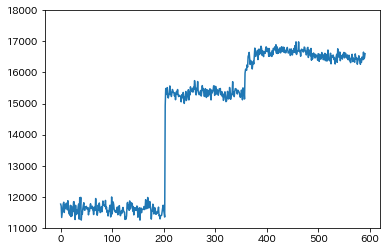

In [6]:
for num in tqdm([1]):
    fig = plt.figure()
    dd = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\{num}.npy")
    
    ax = fig.add_subplot(ylim=(11000,18000))

    plt.plot(dd)
    fig.savefig(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\推移\{num}.png")

In [2]:
num = 4
load_path = rf"Z:\100 Raw_data\20221027---切削実験\AE\Cutting\AE_{num}.tdms"
d = load_tdms(load_path, ch_num=3)

In [ ]:
%matplotlib qt
plt.figure()
plt.plot(d)